In [3]:
import scipy.stats 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import matplotlib.pyplot as plt
import seaborn as sns

Считывание файла

In [4]:
df = pd.read_csv('результаты А_B - cookie_cats 2.csv')

In [4]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [6]:
df.shape

(90189, 5)

In [7]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [8]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [9]:
(df['version'].value_counts()[0] - df['version'].value_counts()[1])/(df['version'].value_counts()[0] + df['version'].value_counts()[1])/2

0.004374147623324352

In [10]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

датасет состоит из 5-ти столбцов( userid, version, sum_gamerounds, retention_1, retention_7). Не содержит пустых ячеек.В таблице содержится примерно одинаковое количество данных от разных версий игры(разница 0,43%).

In [12]:
sum = len(df[df['sum_gamerounds']>0])
sum

86195

In [13]:
sum/90189*100

95.5715220259677

96% значений столбца sum_gamerounds > 0.

## Посмотрим на группы отдельно

In [14]:
df['version']=='gate_30'

0         True
1         True
2        False
3        False
4        False
         ...  
90184    False
90185    False
90186     True
90187    False
90188    False
Name: version, Length: 90189, dtype: bool

In [15]:
df['userid'] = df['userid'].astype('str')


In [16]:
df[df['version']=='gate_30'].describe()

,sum_gamerounds,retention_1,retention_7
count,44700.000000,44700.000000,44700.000000
mean,52.456264,0.448188,0.190201
std,256.716423,0.497314,0.392464
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000
75%,50.000000,1.000000,0.000000
max,49854.000000,1.000000,1.000000


In [17]:
df[df['version']=='gate_40'].describe()

,sum_gamerounds,retention_1,retention_7
count,45489.000000,45489.000000,45489.000000
mean,51.298776,0.442283,0.182000
std,103.294416,0.496663,0.385849
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000
75%,52.000000,1.000000,0.000000
max,2640.000000,1.000000,1.000000


Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в gate_30 сильно больше, чем в группе gate_40. Тем не менее средние значения очень близки. Еще мы знаем, что среднее очень неустойчиво к выбросам, так что нам необходимо будет это учесть.

### Избавимся от некорретных строк. Посчитаем, сколько версий встречается у каждого пользователя.

In [18]:
variants = df.\
    groupby('userid', as_index=False).\
    agg({'version': pd.Series.nunique})

In [19]:
variants.head(10)

,userid,version
0,1000074,1
1,100026,1
2,1000365,1
3,1000372,1
4,1000375,1
5,1000502,1
6,1000589,1
7,1000806,1
8,1000814,1
9,100084,1


In [20]:
variants.shape

(90189, 2)

In [21]:
more_than_one_types = variants.query('version > 1')
more_than_one_types

,userid,version


Пользователей, которые входят в обе версии нет.
Это говорит о том, что было проведено корректное сплитование групп. 

## Проверка на нормальность распределения и применение статистических критериев

### Метрика sum_gamerounds	 (Сумма игр)

#### Проверка на нормальность распределения

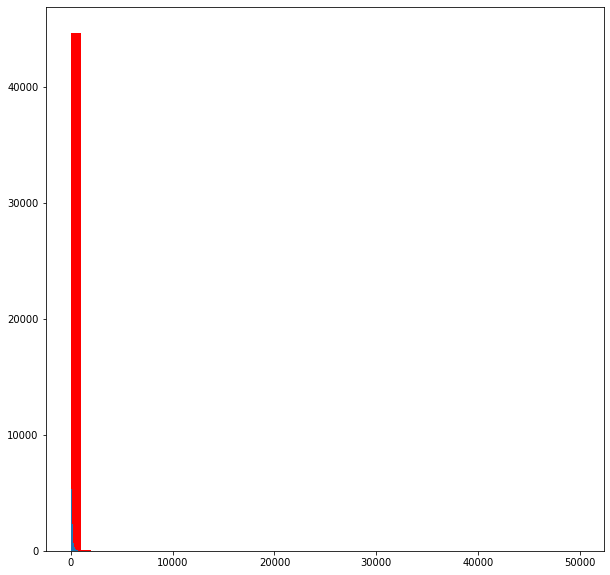

In [22]:
plt.figure(figsize=(10,10))
control_visit_all = df['sum_gamerounds'][df['version']== 'gate_30']

test_visit_all = df['sum_gamerounds'][df['version']== 'gate_40']
plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)
plt.show()

 Непараметрический критерий  Манн-Уитни

In [23]:
df.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [24]:
list1 = df[(df['version'] == 'gate_30')&(df['sum_gamerounds'] > 0)]['sum_gamerounds'].values
list1

array([ 3, 38, 39, ..., 21, 10, 28])

In [25]:
len(list1)

42763

In [26]:
list2 = df[(df['version'] == 'gate_40')&(df['sum_gamerounds'] > 0)]['sum_gamerounds'].values
list2

array([165,   1, 179, ...,  30,  51,  16])

In [27]:
len(list2)

43432

In [28]:
mw_stats = scipy.stats.mannwhitneyu(x=df[(df['version'] == 'gate_30')&(df['sum_gamerounds'] > 0)]['sum_gamerounds'].values,
                                                  y=df[(df['version'] == 'gate_40')&(df['sum_gamerounds'] > 0)]['sum_gamerounds'].values)

In [29]:
mw_stats

MannwhitneyuResult(statistic=934375555.0, pvalue=0.11628458958498972)

Критерий МАНН_УИТНИ не позволяет принять альтернативную гипотезу о разнице суммы игр.

In [34]:
from scipy.stats import shapiro
alpha = 0.05

In [35]:
st = shapiro(df.sum_gamerounds)
st

ShapiroResult(statistic=0.14405512809753418, pvalue=0.0)

In [36]:
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st[1] < alpha]));

Distribution is not normal



In [71]:
control = df.query('version == "gate_30"')

test = df.query('version == "gate_40"')
len(control)

44700

In [38]:
len(test)


45489

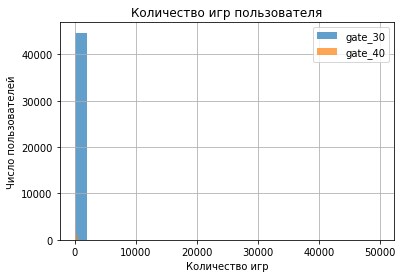

In [39]:
control.sum_gamerounds.hist(bins = 25, alpha =0.7, label='gate_30')
test.sum_gamerounds.hist(bins = 25, alpha =0.7, label='gate_40')
plt.title('Количество игр пользователя')
plt.xlabel('Количество игр')
plt.ylabel('Число пользователей')
plt.legend();

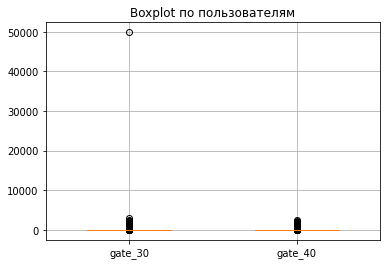

In [40]:
plt.boxplot([control.sum_gamerounds,test.sum_gamerounds],
            labels=['gate_30','gate_40'],
            widths=0.5
           )
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

Для интереса применим Т-тест. Хотя выборка не обладает нормальным распределением.

In [41]:
scipy.stats.stats.ttest_ind(control.sum_gamerounds.values, test.sum_gamerounds.values, equal_var = False)

Ttest_indResult(statistic=0.8854374331270672, pvalue=0.37592438409326223)

Т-тест также не позволяет принять альтернативную гипотезу.

In [72]:
control[control['sum_gamerounds'] > 0 ];


In [68]:
test[test['sum_gamerounds'] > 0];



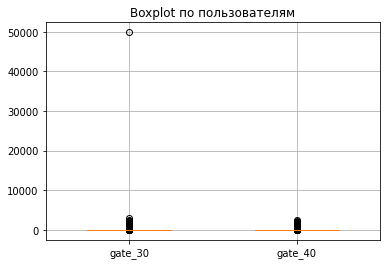

In [73]:
plt.boxplot([control[control['sum_gamerounds'] > 0].sum_gamerounds,test[test['sum_gamerounds'] > 0].sum_gamerounds],
            labels=['gate_30','gate_40'],
            widths=0.5)
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

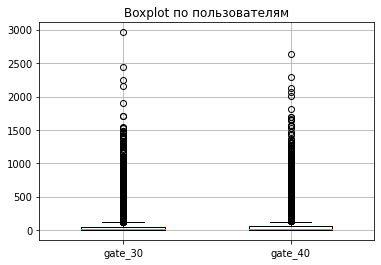

In [75]:
plt.boxplot([control[(control['sum_gamerounds'] > 0) & (control['sum_gamerounds'] < 10000)].sum_gamerounds,test[(test['sum_gamerounds'] > 0) & (test['sum_gamerounds'] < 10000)].sum_gamerounds],
            labels=['gate_30','gate_40'],
            widths=0.5)
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

Расчет мощности

d = (M1 – M2) / S_pooled


S_pooled =

In [77]:
C_mean = control.sum_gamerounds.values.mean()

T_mean = test.sum_gamerounds.values.mean()

In [78]:
C_std = control.sum_gamerounds.values.std()

T_std = test.sum_gamerounds.values.std()

In [79]:
print(len(control.sum_gamerounds.values), len(test.sum_gamerounds.values))

44700 45489


In [80]:
n =  len(control.sum_gamerounds.values)

In [81]:
S = np.sqrt((T_std**2 + C_std **2)/ 2)

In [82]:
effect =float((T_mean-C_mean)/ S)

In [83]:
from statsmodels.stats.power import TTestIndPower

In [84]:
alpha = 0.05

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None,
nobs1=n, ratio=1.0, alpha=alpha)

result

0.14327904497194127

Вывод: Альтернативную гипотезу принять не можем. Также можно сказать, что мощность теста недостаточна.

## Метрика конверсия retention_1, retention_7

Метод пропорций

In [6]:
df['retention_1'].value_counts()

0    50036
1    40153
Name: retention_1, dtype: int64

In [7]:
df['retention_7'].value_counts()

0    73408
1    16781
Name: retention_7, dtype: int64

In [11]:
k1 = df[df['version'] == 'gate_30']['retention_1'].sum()
k1

20034

In [12]:
k2 = df[df['version'] == 'gate_40']['retention_1'].sum()
k2

20119

In [13]:
n1 = df[df['version'] == 'gate_30'].shape[0]
n1

44700

In [14]:
n2 = df[df['version'] == 'gate_40'].shape[0]
n2

45489

In [15]:
from statsmodels.stats import proportion

In [16]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), np.array([n1, n2]))
print('Results are: ', 'z_score = %.3f, z_pvalue =%.3f'% (z_score, z_pvalue))

Results are:  z_score = 1.784, z_pvalue =0.074


In [17]:
if abs(z_pvalue) < 0.05:
  print('We may reject the null hypotesis!')
else:
  print('We have failed to reject the null hypotesis!')

We have failed to reject the null hypotesis!


In [18]:
k1_7 = df[df['version'] == 'gate_30']['retention_7'].sum()
k1_7

8502

In [19]:
k2_7 = df[df['version'] == 'gate_40']['retention_7'].sum()
k2_7

8279

In [20]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1_7, k2_7]), np.array([n1, n2]))
print('Results are: ', 'z_score = %.3f, z_pvalue =%.3f'% (z_score, z_pvalue))

Results are:  z_score = 3.164, z_pvalue =0.002


In [21]:
if abs(z_pvalue) < 0.05:
  print('We may reject the null hypotesis!')
else:
  print('We have failed to reject the null hypotesis!')

We may reject the null hypotesis!


Метод Непараметрический Хи-квадрат

In [22]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1,k2]), np.array([n1,n2]))
print('Results are ', 'chisq = %.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq = 3.183, pvalue = 0.074


In [23]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1_7,k2_7]), np.array([n1,n2]))
print('Results are ', 'chisq = %.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq = 10.013, pvalue = 0.002


По вспомогательной метрике retention_7 мы можем отвергнуть нулевую гипотезу, но мы не можем этого сделать, так как по основной метрике количество игр мы не можем принять альтернативную гипотезу.